In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

## fetching Data

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

In [3]:
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

In [4]:
X_valid, X_train = X_train[:5000]/255.0, X_train[5000:]/255.0
Y_valid, Y_train = Y_train[:5000] , Y_train[5000:]

In [5]:
classes = ['top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

In [6]:
classes[Y_train[0]]

'coat'

## creating model

In [7]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

2022-04-24 13:49:43.568916: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-04-24 13:49:44.355370: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22824 MB memory:  -> device: 0, name: NVIDIA TITAN RTX, pci bus id: 0000:02:00.0, compute capability: 7.5


In [8]:
def train_model(optimizer):
    stop_cb = keras.callbacks.EarlyStopping(patience=4, restore_best_weights=True)
    model.compile(loss="sparse_categorical_crossentropy", optimizer = optimizer, metrics=["accuracy"])
    history = model.fit(X_train, Y_train, epochs=100, validation_data=(X_valid, Y_valid), callbacks=[stop_cb])
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    min_epoch = np.argmin(history.history['val_loss'])
    max_accuracy = max(history.history['val_accuracy'])
    min_loss = min(history.history['val_loss'])
    print("Minimun gained in epoch:", min_epoch)
    print("accuracy:", max_accuracy)
    print("loss:", min_loss)
    return model

### SGD

In [9]:
optimizer = keras.optimizers.SGD(lr=0.001)

/home/gpu/pyenv/py3.8env/lib/python3.8/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/100
1719/1719 [==============================] - 8s 4ms/step - loss: 1.4216 - accuracy: 0.5916 - val_loss: 0.9595 - val_accuracy: 0.7030
Epoch 2/100
1719/1719 [==============================] - 6s 4ms/step - loss: 0.8493 - accuracy: 0.7274 - val_loss: 0.7463 - val_accuracy: 0.7616
Epoch 3/100
1719/1719 [==============================] - 6s 4ms/step - loss: 0.7132 - accuracy: 0.7651 - val_loss: 0.6588 - val_accuracy: 0.7880
Epoch 4/100
1719/1719 [==============================] - 6s 4ms/step - loss: 0.6464 - accuracy: 0.7853 - val_loss: 0.6087 - val_accuracy: 0.8004
Epoch 5/100
1719/1719 [==============================] - 6s 4ms/step - loss: 0.6035 - accuracy: 0.7995 - val_loss: 0.5776 - val_accuracy: 0.8096
Epoch 6/100
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5734 - accuracy: 0.8081 - val_loss: 0.5498 - val_accuracy: 0.8170
Epoch 7/100
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5502 - accuracy: 0.8158 - val_loss: 0.5305 - val_ac

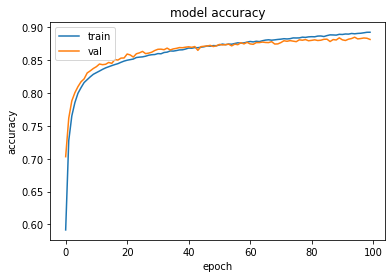

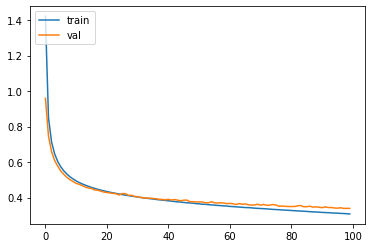

Minimun gained in epoch: 97
accuracy: 0.8848000168800354
loss: 0.3392343521118164


In [10]:
train_model(optimizer)

## SGD with momentum

Epoch 1/100
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3445 - accuracy: 0.8779 - val_loss: 0.4004 - val_accuracy: 0.8566
Epoch 2/100
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3318 - accuracy: 0.8825 - val_loss: 0.3419 - val_accuracy: 0.8760
Epoch 3/100
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3227 - accuracy: 0.8855 - val_loss: 0.3605 - val_accuracy: 0.8746
Epoch 4/100
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3131 - accuracy: 0.8891 - val_loss: 0.3610 - val_accuracy: 0.8752
Epoch 5/100
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3044 - accuracy: 0.8922 - val_loss: 0.3252 - val_accuracy: 0.8862
Epoch 6/100
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2982 - accuracy: 0.8942 - val_loss: 0.3327 - val_accuracy: 0.8810
Epoch 7/100
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2912 - accuracy: 0.8965 - val_loss: 0.3147 - val_ac

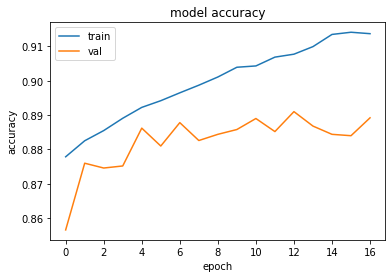

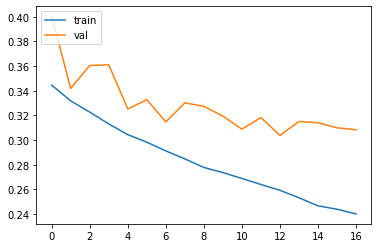

Minimun gained in epoch: 12
accuracy: 0.890999972820282
loss: 0.30381518602371216


In [11]:
optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9)
train_model(optimizer)

## SGD with Nesterov Accelerated Gradient

Epoch 1/100
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1613 - accuracy: 0.9407 - val_loss: 0.2718 - val_accuracy: 0.9032
Epoch 2/100
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1578 - accuracy: 0.9417 - val_loss: 0.2697 - val_accuracy: 0.9010
Epoch 3/100
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1549 - accuracy: 0.9427 - val_loss: 0.2705 - val_accuracy: 0.9008
Epoch 4/100
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1526 - accuracy: 0.9437 - val_loss: 0.2705 - val_accuracy: 0.9028
Epoch 5/100
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1502 - accuracy: 0.9445 - val_loss: 0.2739 - val_accuracy: 0.9022
Epoch 6/100
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1481 - accuracy: 0.9459 - val_loss: 0.2725 - val_accuracy: 0.9042


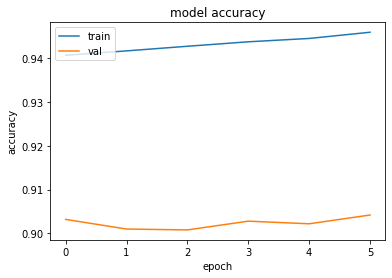

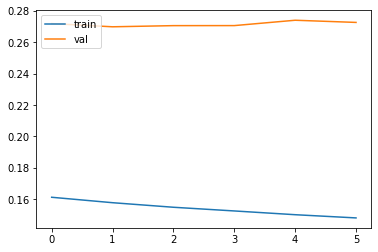

Minimun gained in epoch: 1
accuracy: 0.90420001745224
loss: 0.26972639560699463


In [15]:
optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9,nesterov=True)
train_model(optimizer)

## AdaGrad

In [16]:
optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.001)

Epoch 1/100
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1515 - accuracy: 0.9450 - val_loss: 0.2698 - val_accuracy: 0.9028
Epoch 2/100
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1502 - accuracy: 0.9451 - val_loss: 0.2688 - val_accuracy: 0.9022
Epoch 3/100
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1492 - accuracy: 0.9448 - val_loss: 0.2682 - val_accuracy: 0.9012
Epoch 4/100
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1484 - accuracy: 0.9456 - val_loss: 0.2685 - val_accuracy: 0.9018
Epoch 5/100
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1477 - accuracy: 0.9459 - val_loss: 0.2686 - val_accuracy: 0.9022
Epoch 6/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1471 - accuracy: 0.9461 - val_loss: 0.2690 - val_accuracy: 0.9022
Epoch 7/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1465 - accuracy: 0.9457 - val_loss: 0.2692 - val_ac

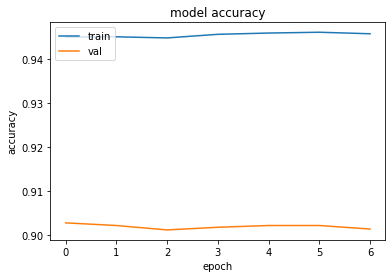

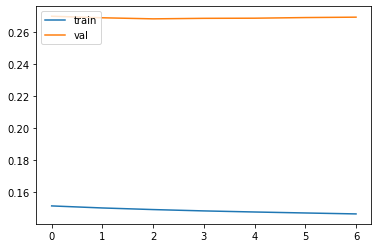

Minimun gained in epoch: 2
accuracy: 0.9028000235557556
loss: 0.26818448305130005


In [17]:
train_model(optimizer)

## RMSProp

Epoch 1/100
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3065 - accuracy: 0.8895 - val_loss: 0.3340 - val_accuracy: 0.8874
Epoch 2/100
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3039 - accuracy: 0.8934 - val_loss: 0.3989 - val_accuracy: 0.8784
Epoch 3/100
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3020 - accuracy: 0.8943 - val_loss: 0.3763 - val_accuracy: 0.8824
Epoch 4/100
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2976 - accuracy: 0.8976 - val_loss: 0.4415 - val_accuracy: 0.8742
Epoch 5/100
1719/1719 [==============================] - 8s 4ms/step - loss: 0.2976 - accuracy: 0.8973 - val_loss: 0.4310 - val_accuracy: 0.8830


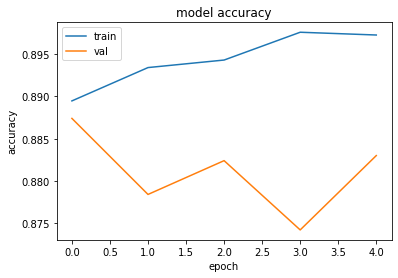

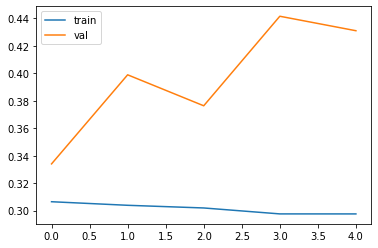

Minimun gained in epoch: 0
accuracy: 0.8873999714851379
loss: 0.3340336084365845


In [18]:
optimizer = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)
train_model(optimizer)

## ADAM

/home/gpu/pyenv/py3.8env/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2827 - accuracy: 0.8959 - val_loss: 0.3230 - val_accuracy: 0.8860
Epoch 2/100
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2599 - accuracy: 0.9029 - val_loss: 0.3294 - val_accuracy: 0.8832
Epoch 3/100
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2474 - accuracy: 0.9079 - val_loss: 0.3320 - val_accuracy: 0.8794
Epoch 4/100
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2364 - accuracy: 0.9114 - val_loss: 0.3045 - val_accuracy: 0.8960
Epoch 5/100
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2277 - accuracy: 0.9134 - val_loss: 0.3073 - val_accuracy: 0.8940
Epoch 6/100
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2188 - accuracy: 0.9171 - val_loss: 0.3286 - val_accuracy: 0.8898
Epoch 7/100
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2109 - accuracy: 0.9194 - val_loss: 0.3016 - val_ac

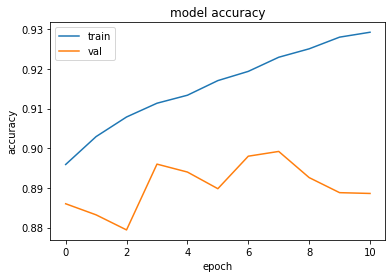

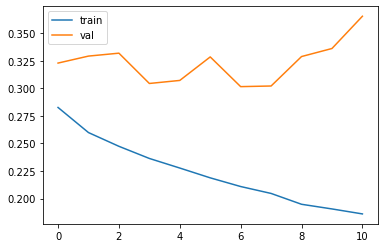

Minimun gained in epoch: 6
accuracy: 0.8992000222206116
loss: 0.3016255795955658


In [19]:
optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
train_model(optimizer)

## Adamax

/home/gpu/pyenv/py3.8env/lib/python3.8/site-packages/keras/optimizer_v2/adamax.py:90: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adamax, self).__init__(name, **kwargs)


Epoch 1/100
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1540 - accuracy: 0.9416 - val_loss: 0.2857 - val_accuracy: 0.9038
Epoch 2/100
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1432 - accuracy: 0.9459 - val_loss: 0.3005 - val_accuracy: 0.9010
Epoch 3/100
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1382 - accuracy: 0.9480 - val_loss: 0.2894 - val_accuracy: 0.9062
Epoch 4/100
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1330 - accuracy: 0.9502 - val_loss: 0.2997 - val_accuracy: 0.9066
Epoch 5/100
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1285 - accuracy: 0.9518 - val_loss: 0.2926 - val_accuracy: 0.9072


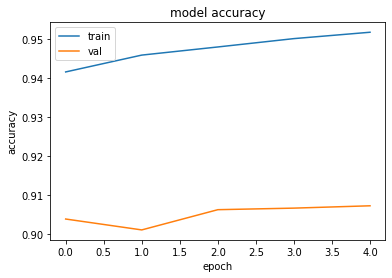

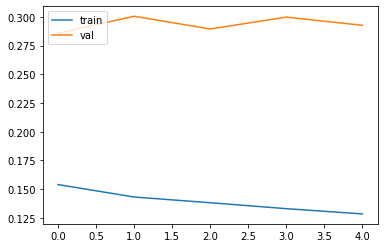

Minimun gained in epoch: 0
accuracy: 0.9071999788284302
loss: 0.2856724262237549


In [20]:
optimizer = keras.optimizers.Adamax(lr=0.001, beta_1=0.9, beta_2=0.999)
train_model(optimizer)

## Nadam

/home/gpu/pyenv/py3.8env/lib/python3.8/site-packages/keras/optimizer_v2/nadam.py:73: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Nadam, self).__init__(name, **kwargs)


Epoch 1/100
1719/1719 [==============================] - 10s 5ms/step - loss: 0.1968 - accuracy: 0.9254 - val_loss: 0.3155 - val_accuracy: 0.8984
Epoch 2/100
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1879 - accuracy: 0.9285 - val_loss: 0.3135 - val_accuracy: 0.8988
Epoch 3/100
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1809 - accuracy: 0.9314 - val_loss: 0.3360 - val_accuracy: 0.8954
Epoch 4/100
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1750 - accuracy: 0.9336 - val_loss: 0.3325 - val_accuracy: 0.8950
Epoch 5/100
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1716 - accuracy: 0.9359 - val_loss: 0.3473 - val_accuracy: 0.8958
Epoch 6/100
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1665 - accuracy: 0.9375 - val_loss: 0.3468 - val_accuracy: 0.8924


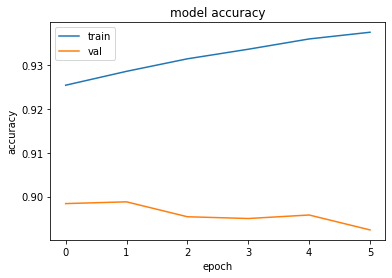

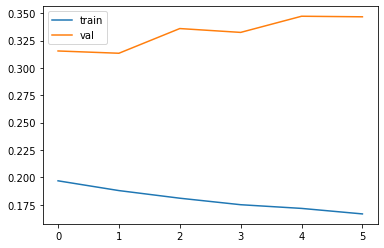

Minimun gained in epoch: 1
accuracy: 0.8988000154495239
loss: 0.3134623169898987


In [21]:
optimizer = keras.optimizers.Nadam(lr=0.001, beta_1=0.9, beta_2=0.999)
train_model(optimizer)